# Case Study 2

There is 1 dataset(csv) with 3 years’ worth of customer orders. There are 4 columns in the csv dataset: index,
CUSTOMER_EMAIL (unique identifier as hash), Net Revenue, and Year. 


In [195]:
import pandas as pd      
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
df=pd.read_csv('casestudy.csv')    #read the dataset in dataframe df

Input the current year:

In [196]:
num = int(input ("Enter year :"))
if num == 2016:
    df = df[df['year']!=2017]

Enter year :2017


**1) Total revenue for the current year**



In [197]:
data_of_current_year = df[df.year == num]

In [198]:
total_revenue_of_current_year = data_of_current_year['net_revenue'].sum()

In [199]:
total_revenue_of_current_year

31417495.030000016

Since it is not clear what current year is, we can consider taking input from the user itself

**2) New Customer Revenue**

In [200]:
data = df.pivot(index=["customer_email"],  # Columns that will not change
                  columns="year",        # Column holding new column names/categories
                  values="net_revenue")  # Name of value column to spread

In [201]:
q2 = data[data[num-1].isna() & data[num].notna()]

In [202]:
total_revenue_newcust = q2[num].sum()

In [203]:
total_revenue_newcust

28776235.039999995

**3) Existing Customer Growth** 

To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [204]:
data1 = data[[num,num-1]]  #filtering only current and previous year data

In [205]:
q3 = data1[data1[num].notna() & data1[num-1].notna()]    #removing all the nan data for current and previous year 

In [206]:
q3['Growth'] = q3[num] - q3[num-1]   #finding the growth

In [207]:
q3

year,2017,2016,Growth
customer_email,,,
aabmjtmoae@gmail.com,64.32,124.29,-59.97
aabokiywci@gmail.com,119.83,9.95,109.88
aabuefrfjq@gmail.com,84.30,131.22,-46.92
aacpbgkntc@gmail.com,8.28,136.06,-127.78
aadbgmnypp@gmail.com,115.23,86.82,28.41
...,...,...,...
zzurtiklzf@gmail.com,199.13,176.10,23.03
zzvasxeybi@gmail.com,237.84,11.88,225.96
zzvgdegvtp@gmail.com,107.59,79.93,27.66


**4) Revenue lost from attrition**

In [208]:
q4 = data[data[num-1].notna() & data[num].isnull()] 

In [209]:
revenue_Lost_from_Attrition = q4[num-1].sum()

In [210]:
revenue_Lost_from_Attrition

23110294.94

**5) Existing Customer Revenue Current Year**

In [211]:
q5 = data[data[num].notna() & data[num-1].notna()] #filtering on customers who didnt buy in current year and prior year

In [212]:
Existing_Customer_Revenue_Current_Year = q5[num].sum()       #finding the total revenue for existing customer in current year

In [213]:
Existing_Customer_Revenue_Current_Year

2641259.99

**6) Existing Customer Revenue Prior Year**

In [214]:
Existing_Customer_Revenue_Prior_Year = q5[num-1].sum()   #finding the total revenue for existing customer in prior year

In [215]:
Existing_Customer_Revenue_Prior_Year

2620648.65

**7) Total Customers Current Year**

In [216]:
total_Customers_Current_Year = len(data[data[num].notna()]) #removing all the customers who didnt buy in 2017 and then counting the total customers in current year

In [217]:
total_Customers_Current_Year

249987

**8) Total Customers Previous Year**

In [218]:
total_Customers_Previous_Year = len(data[data[int(num)-1].notna()]) #removing all the customers who didnt buy in 2016 and then counting the total customers in prior year

**9) New Customers**

In [219]:

def new_customers_(yr):
    if yr == 2017:
        return  len(data[data[num-2].isnull() & data[num-1].isnull() & data[num].notna()])   
    else:
        return len(data[num-1].isnull() & data[num].notna())

In [220]:
new_customers_(2016)

604618

**10) Lost Customers**

In [221]:
def lost_customers_(yr):
    return len(data[data[yr].isnull()]) #filtering on customers who bought previous all years but not in current year 

In [222]:
lost_customers_(num)

354631

The average net revenue for all the years is the same

In [223]:
r = pd.DataFrame(df.groupby('year')['net_revenue'].sum()).reset_index()
c = pd.DataFrame(df.groupby('year').count()).reset_index()

Text(0.5, 1.0, 'Net Revenue over years')

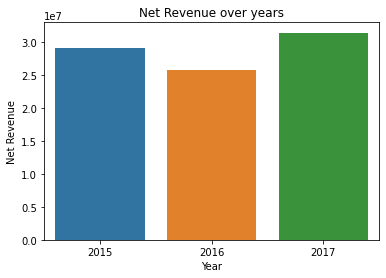

In [236]:
sns.barplot(x = r['year'], y = r['net_revenue'])
plt.xlabel('Year')
plt.ylabel('Net Revenue')
plt.title('Net Revenue over years')

Here we can see that the net revenue decreased in 2016 from 2015 but then again increased in 2017

Text(0.5, 1.0, 'Count of Customers over years')

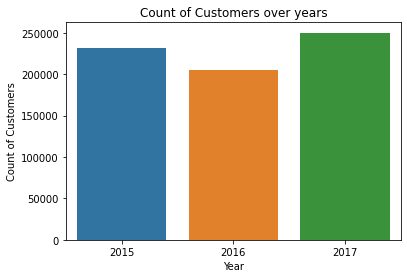

In [237]:
sns.barplot(x = c['year'], y = c['customer_email'])
plt.xlabel('Year')
plt.ylabel('Count of Customers')
plt.title('Count of Customers over years')

Here we can see that the number of customers decreased in 2016 from 2015 but then again increased in 2017 which aligns with the structure of net revenue

Text(0.5, 1.0, 'New Customers over years')

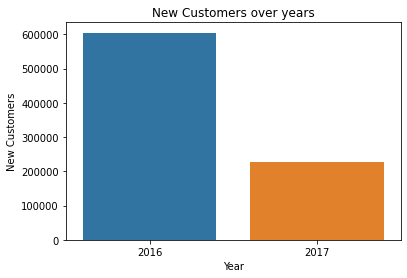

In [238]:
sns.barplot(x = ['2016','2017'], y = [new_customers_(2016),new_customers_(2017)])
plt.xlabel('Year')
plt.ylabel('New Customers')
plt.title('New Customers over years')

Though there are not many new customers in 2017, it seems that an increase revenue means that the existing customers ordered more


Text(0.5, 1.0, 'Growth count from 2016 to 2017')

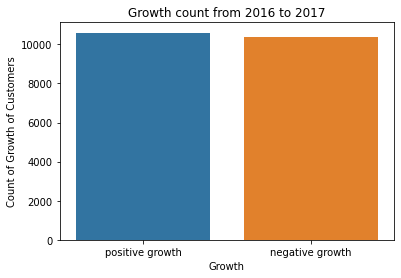

In [240]:
a = q3['Growth']
cnt,cnt_ = 0,0
for i in a:
    if i>=0:cnt+=1
    else:cnt_+=1
sns.barplot(x = ['positive growth','negative growth'], y = [cnt,cnt_])
plt.ylabel('Count of Growth of Customers')
plt.xlabel('Growth')
plt.title('Growth count from 2016 to 2017')

We can see that though the number of customers who grew positively is almost equivalent to the ones who grew negatively, the positve ones are more

Text(0.5, 1.0, 'Lost Customers over years')

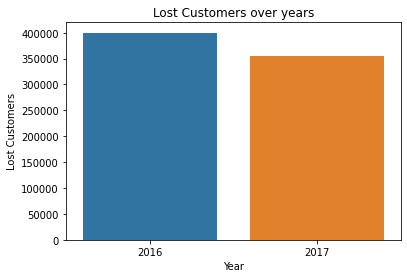

In [241]:
sns.barplot(x = ['2016','2017'], y = [lost_customers_(2016),lost_customers_(2017)])
plt.xlabel('Year')
plt.ylabel('Lost Customers')
plt.title('Lost Customers over years')

The business did not lose many customers after 2016 till 2017